# Flight Solutions


# Goals
* ML analysis model that decodes a decade of flight data to predict and manage airline delay.
* Optimize operations, enhance passenger experience.

## Imports

In [1]:
# importing the necessary libraries to run the code
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
import wrangle
import statsmodels.api as sm

# from wrangle import 

import explore as e
# # from explore import 
import model as m
# from modeling import 
# from modeling import

import warnings
warnings.filterwarnings("ignore")

## Acquire

* Aquire data from https://data.world/food/wine-quality
* Octber 2009 and July 2011 are missing the entire months of data.
* Each observation represent an average delay for that day.
* We are measuring the average delays for each day for the last ten years

## Prepare

* Checked for nulls in the data (there were none)
* Checked fi]or duplicates (there were none)
* Filter flight data to only rows with delays.
* Filter the data to to four airlines: Delta, American, Southwest, and United Airlines.
* Filter the data to include only the top 15 Class B Airlines.
* Split data into train, validate and test.
* Outliers have not been removed for this iteration of the project.

In [2]:
# used my wrangle function that acquires, preps and cleans the data
flights = wrangle.pull_airline_data('WN')
df = wrangle.clean_flight_data_for_average_daily_delay(flights)

# splits data train, validate, test
train, validate, test = m.train_test_split(df, 'd')
train_fl, validate_fl, test_fl = m.train_fl_test_fl_split(flights, '2W')

# Data At a Glance

In [3]:
train_fl.head(3)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,row_sums
FL_DATE,,,,,,,,,,
2009-01-01,WN,82,DEN,AMA,1.0,0.0,0.0,0.0,105.0,106.0
2009-01-01,WN,1023,DEN,AUS,16.0,0.0,0.0,0.0,0.0,16.0
2009-01-01,WN,2494,DEN,AUS,34.0,0.0,0.0,0.0,0.0,34.0


In [4]:
train.head(3)

,average_delay
FL_DATE,
2009-01-01,38.719512
2009-01-02,54.142857
2009-01-03,34.230159


In [5]:
# display a snapshot of summary statistics
train.describe()


,average_delay
count,2922.000000
mean,46.517230
std,12.313389
min,21.137931
25%,38.056010
50%,43.876663
75%,52.468103
max,129.580000


# Explore

### Is the mean at each airport equal or is there something causing  a difference?


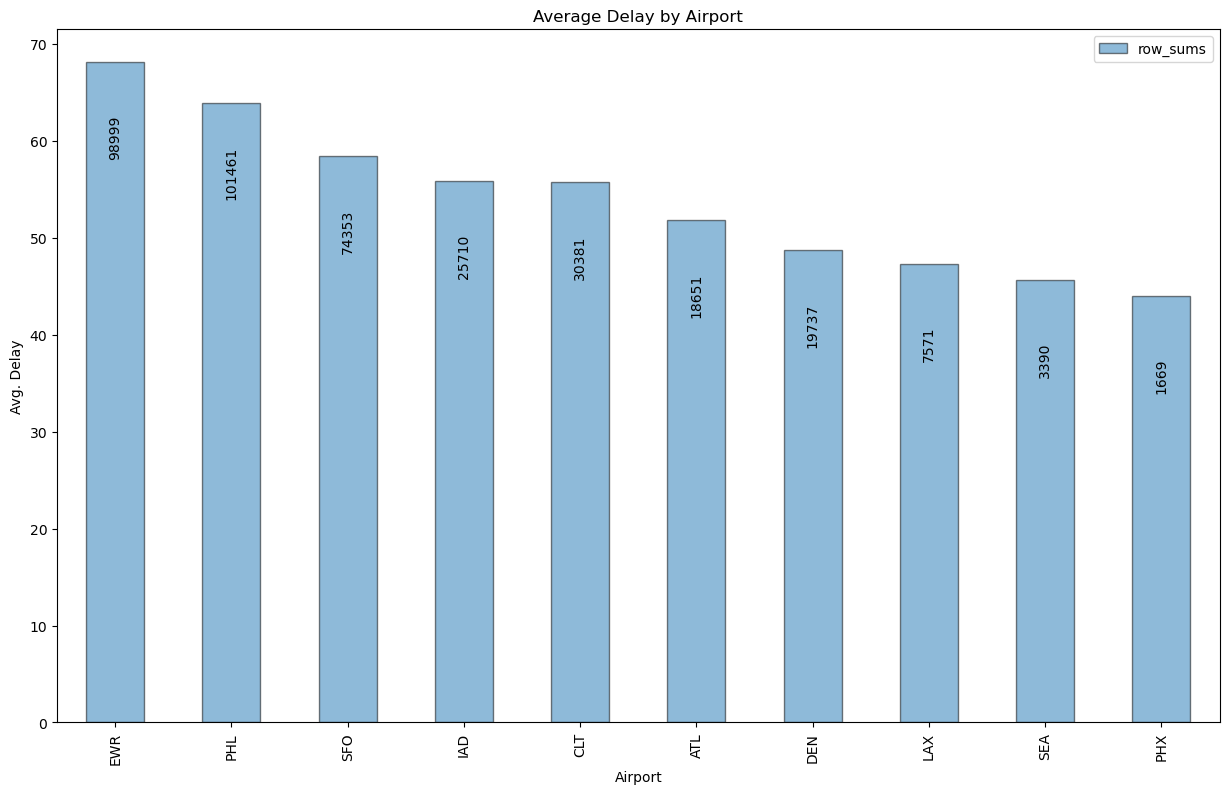

In [6]:
m.means_by_airport(flights, train_fl)

### Takeaways:

* DFW has the highest average of delay and the most flights
* The order of means seems to reflect the flights as well, compared to other airports.
* 

# Stats Testing

## Hypothesis:

H 0 : The average delay in each airport are all the same.

H a : The average delay in each airport are not all the same.

In [7]:
f, p = m.anova_airport_test(flights)
f, p

KeyError: 'DFW_mean'

### *Are current months correlated with the proceeding month?


In [ ]:
m.plot_best_lag_plot(train, 'm', 1)

### Takeaways:
* As the
* Wines tare 237
* Red 

# Stats Testing

## Hypothesis:

H 0 : There is no linear correlation between monthly delay and monthly lag delay.

H a : There is a linear correlation between monthly delay and monthly lag delay.

## Pearson's R-test¶

In [ ]:

α = 0.05

corr, p = m.pearsons_r_test(train, 'm')
corr, p

## P-value less than alpha?

In [ ]:
p < α

### We can reject the null hypothesis.


## * Is the mean of each month equal or is there something causing a difference?

In [ ]:
m.plot_month_delay(train_fl)

### Takeaways:

* Summertime has the highest averages for the year
* The aveage delay dips during the colder months

# Stats Testing
## Hypothesis:
H
0
: The average pH level in red and white wines is the same.

H
a
: The average pH in is greater in red wines.
## Anova Test

In [ ]:
# getting theire data
f, p = m.anova_month_test(train)

f,p


### We can reject the null hypothesis.


### *Are current fort nights correlated with the proceeding fort nights?


In [ ]:
m.plot_best_lag_plot(train, '2w', 1)

### Takeaways
* Chlorides 
* As t
* There

# Stats Testing

## Hypothesis:

H 0 : There is no linear correlation between monthly delay and monthly lag delay.

H a : There is a linear correlation between monthly delay and monthly lag delay.

## Pearson's R-test¶

In [ ]:
corr, p = m.pearsons_r_test(train, '2w')
corr, p

#  Analysis
* As seen a
* For insta
* The mean
* However 



---

In [ ]:
flights = wrangle.pull_airline_data('UA')

In [ ]:
flights

## Clean dataset imputing 0 for nulls as they represent no delay and combining all delays into one column AND then averaging the delay by day

In [ ]:
flights_daily_mean = wrangle.clean_flight_data_for_average_daily_delay(flights)
flights_daily_mean

## Plot average by varying time intervals

In [ ]:
e.plot_average_by_interval(flights_daily_mean)

In [ ]:
e.plot_best_lag_plot(flights_daily_mean)

## Split

In [ ]:
train, validate, test = m.train_test_split(flights_daily_mean, '2W')

In [ ]:
train

In [ ]:
print(f'The average of the average delays is {train.mean()[0]:.2f} minutes')

## Plot the split

In [ ]:
m.graph_split(train, validate, test)

## Seasonal Decomposition

In [ ]:
e.seasonal_decomposition_plot(train, '2W')

## Baselines

In [ ]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
yhat_df = pd.DataFrame(columns=['average_delay'])

## Last Average

In [ ]:
eval_df = m.last_average_baseline(train, validate, yhat_df, eval_df)
eval_df


## Total Average

In [ ]:
eval_df = m.total_average_baseline(train, validate, yhat_df, eval_df)
eval_df


## Rolling Average

In [ ]:
eval_df = m.rolling_average_baselines(train, validate, yhat_df, eval_df)
eval_df

### Baseline RMSE = 6.14 minutes

# Models

In [ ]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
yhat_df = pd.DataFrame(columns=['average_delay'])

## Holt's Linear Trend

In [ ]:
eval_df = m.holt_linear(train, validate, yhat_df, eval_df)
eval_df

average_delay -- RMSE: 6


## Holt's Seasonal Trend

In [ ]:
eval_df = m.holts_average_delay(train, validate, yhat_df, eval_df)
eval_df

## Previous Cycle

In [ ]:
eval_df = m.previous_period(train, validate, yhat_df, eval_df)
eval_df

Best rmse: 5.01 minutes --- Delta: 1.13 minutes

### There seems to be no overfitting here the best model is Holt's Seasonal with Dampening

## Test

In [ ]:
yhat_df = m.final_plot('average_delay', train, validate, test, yhat_df)

In [ ]:
test, yhat_df = m.final_rmse(test, yhat_df)

Forecast

forecast = model.forecast_plot('average_delay', train, validate, test, yhat_df)
forecast.head()

# Conclusions

- There is a clear seasonality to the delays
- Our rmse jumped over baseline for all Airlines despite great performance on train and - validate.
- The seasonal trend IS useful and can inform expected delays given the time of the year.
- Even the best models couldn't predict COVID!!!
- Covid started in 2019 and started to affect international flights in December. This may explain the result.
- Summer of 2011 had a massive delay spike for every ariline.
- 2013 showed the lowest point in the trendline

# Next steps

## Another look at trends and residuals

In [ ]:
sm.tsa.seasonal_decompose(train['average_delay']).plot()